In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mpmp.config as cfg
import mpmp.utilities.analysis_utilities as au
import mpmp.utilities.plot_utilities as plu

%load_ext autoreload
%autoreload 2

In [2]:
# set results directory
results_dir = Path(cfg.results_dirs['mutation'], 'compare_nonlinear').resolve()

In [4]:
results_df = []
for subdir in results_dir.iterdir():
    model_info = subdir.stem.split('_')
    n_feats = model_info[-1]
    model_desc = '_'.join(model_info[:-1])
    gene_dir = Path(subdir, 'gene')
    model_results_df = au.load_stratified_prediction_results(gene_dir, 'gene')
    model_results_df['n_feats'] = n_feats
    if '_f_test' in model_desc:
        model_results_df['model_desc'] = model_desc.replace(
            '_f_test', ', f-test'
        )
    elif '_random' in model_desc:
        model_results_df['model_desc'] = model_desc.replace(
            '_random', ', random'
        )
    else:
        model_results_df['model_desc'] = model_desc + (
            ', MAD'
        )
    results_df.append(model_results_df)
    
results_df = pd.concat(results_df)
print(results_df.shape)
results_df.head()

(1716, 11)


,auroc,aupr,identifier,training_data,signal,seed,data_type,fold,experiment,n_feats,model_desc
0,0.97487,0.97501,TP53,expression,shuffled,42,train,0,gene,1000,"nonlinear, random"
1,0.73961,0.72853,TP53,expression,shuffled,42,test,0,gene,1000,"nonlinear, random"
2,0.63911,0.59316,TP53,expression,shuffled,42,cv,0,gene,1000,"nonlinear, random"
3,0.82093,0.80891,TP53,expression,shuffled,42,train,1,gene,1000,"nonlinear, random"
4,0.73851,0.71966,TP53,expression,shuffled,42,test,1,gene,1000,"nonlinear, random"


<AxesSubplot:xlabel='identifier', ylabel='aupr'>

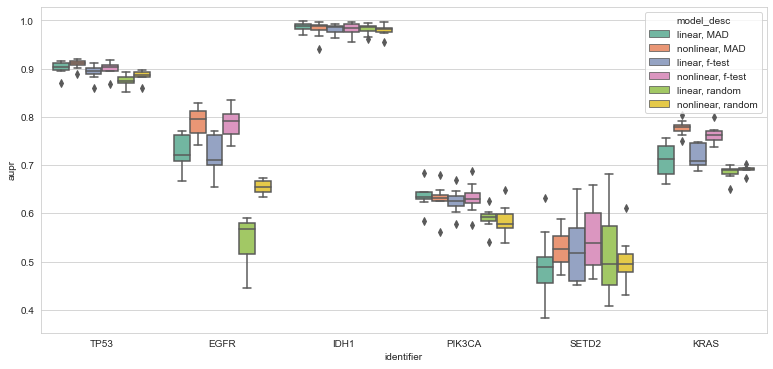

In [6]:
sns.set({'figure.figsize': (13, 6)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

plot_df = results_df[((results_df.signal == 'signal') &
                      (results_df.data_type == 'test'))]
hue_order = [
    'linear, MAD',
    'nonlinear, MAD',
    'linear, f-test',
    'nonlinear, f-test',
    'linear, random',
    'nonlinear, random'
]
sns.boxplot(data=plot_df, x='identifier', y='aupr', hue='model_desc',
            hue_order=hue_order)